# Importing Necessary Libraries

In [1]:
import pandas as pd  # data analysis
import numpy as np # Scientific computation

# data visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# suppress unnecessary warings
import warnings
warnings.filterwarnings('ignore')

# train test split
from sklearn.model_selection import train_test_split

# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# model building 
from sklearn.linear_model import LogisticRegression

# variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# metrics analysis
from sklearn import metrics

# STEP 1: DATA LOADING AND UNDERSTANDING OF DATA

In [2]:
lead = pd.read_csv('Leads.csv')

In [3]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead.shape

(9240, 37)

In [5]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# STEP 2: DATA CLEANING AND PREPARATION

# Missing value check

In [7]:
lead.isnull().sum().sort_values(ascending= False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [8]:
100*lead.isnull().mean().sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

## Remove columns with missing values greater than 30%

In [9]:
for col in lead.columns:
    if 100*lead[col].isnull().mean() > 30:
        lead.drop(col, axis = 1, inplace = True)

In [10]:
100 * lead.isnull().mean().sort_values(ascending = False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

# checking for unique values in each of the features

In [11]:
for col in lead.columns:
    if lead[col].dtype == 'object':
        print(lead[col].value_counts())
        print("-"*50)

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
--------------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
--------------------------------------------------
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook        

### From above analysis, it is noted that the columns 'Specialization', 'Lead Profile', 'How did you hear about X Education' and 'City' have 'select' as a category which is of no use. Lets check the percentage of category 'select' in each of the above columns

In [12]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
def percentageOfSelect(col):
    print(round((lead[col] == 'Select').mean()*100, 2))

In [14]:
percentageOfSelect('Specialization')

21.02


In [15]:
percentageOfSelect('Lead Profile')

44.87


In [16]:
percentageOfSelect('How did you hear about X Education')

54.58


In [17]:
percentageOfSelect( 'City')

24.34


### From above, it is clear that the columns holds greater than 20% data are of category 'Select'. Therefore, there is no use of those columns except 'Specialization' column, so drop it

In [18]:
lead.drop(['Lead Profile','How did you hear about X Education','City'], axis = 1, inplace = True)

In [19]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [20]:
round(100*lead.isnull().mean(), 2).sort_values(ascending = False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
X Education Forums                                0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Newspaper                                         0.00
Prospect ID                                       0.00
Newspaper 

In [21]:
# From unique values of columns, we also note that many columns have majorly one category

cols_drop = ["What matters most to you in choosing a course", 
             "Search",
             "Magazine",
             "Do Not Call",
             "Newspaper Article", 
             "X Education Forums","Newspaper",
             "Digital Advertisement",
             "Through Recommendations", 
             "Receive More Updates About Our Courses",
             "Update me on Supply Chain Content",
             "Get updates on DM Content",
             "I agree to pay the amount through cheque"]

for col in cols_drop:
    print(lead[col].value_counts())
    print('-'*70)

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
----------------------------------------------------------------------
No     9226
Yes      14
Name: Search, dtype: int64
----------------------------------------------------------------------
No    9240
Name: Magazine, dtype: int64
----------------------------------------------------------------------
No     9238
Yes       2
Name: Do Not Call, dtype: int64
----------------------------------------------------------------------
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
----------------------------------------------------------------------
No     9239
Yes       1
Name: X Education Forums, dtype: int64
----------------------------------------------------------------------
No     9239
Yes       1
Name: Newspaper, dtype: int64
----------------------------------------------------------------------
No     92

In [22]:
## Drop the above columns

lead.drop(cols_drop, axis = 1, inplace = True)

In [23]:
lead.shape

(9240, 15)

In [24]:
round(100*lead.isnull().mean(),2).sort_values(ascending = False)

What is your current occupation           29.11
Country                                   26.63
Specialization                            15.56
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [25]:
# Country column

lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [26]:
((lead['Country'] == 'India').mean())*100

70.25974025974025

### Nearly 70% of data are 'India' + 29% values are missing. Therefore, maximum course takers are indians and there is no use in imputing missing values with 'India', so drop the column 'Country'

In [27]:
lead.drop('Country', axis = 1, inplace = True)

In [28]:
round(100*lead.isnull().mean(),2).sort_values(ascending = False)

What is your current occupation           29.11
Specialization                            15.56
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Do Not Email                               0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [29]:
lead.isnull().sum().sort_values(ascending = False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [30]:
len(lead[lead['What is your current occupation'].isnull() & lead['Specialization'].isnull()])

1420

### The common missing values in columns 'What is your current occupation' and 'Specialization' is 1420.
### Therefore, drop these common missing data points

In [31]:
mv = lead[lead['What is your current occupation'].isnull() & lead['Specialization'].isnull()]
mv.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,No,Modified
16,3abb7c77-1634-4083-9a9f-861068220611,660540,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,No,Modified
33,5af0914a-fa65-48e1-b11e-b44849206dc3,660339,API,Organic Search,No,0,3.0,74,1.5,Email Opened,NaN,NaN,No,Modified
47,3f04fd93-2884-45f6-a4fc-f3b6f234554b,660153,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,No,Modified


In [32]:
mv.shape

(1420, 14)

In [33]:
lead.shape

(9240, 14)

In [34]:
lead = lead.drop(mv.index, axis = 0)

In [35]:
lead.shape

(7820, 14)

In [36]:
lead.isnull().sum().sort_values(ascending = False)

What is your current occupation           1270
TotalVisits                                130
Page Views Per Visit                       130
Last Activity                              103
Lead Source                                 36
Specialization                              18
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

### Except column 'What is your current occupation' and 'Specialization', replace all missing values columns with mode value for categorical feature and mean value for numerical feature

In [37]:
lead['Lead Source'].fillna(value = lead['Lead Source'].mode()[0], inplace =True)

In [38]:
lead['TotalVisits'].fillna(value = round(lead['TotalVisits'].median()), inplace =True)

In [39]:
lead['Page Views Per Visit'].fillna(value = round(lead['Page Views Per Visit'].median()), inplace =True)

In [40]:
lead['Last Activity'].fillna(value = lead['Last Activity'].mode()[0], inplace =True)

### DROP THE COLUMNS 'Prospect ID' and 'Lead Number' which is of no use.

In [41]:
lead.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace =True)

In [42]:
lead.isnull().sum().sort_values(ascending = False)

What is your current occupation           1270
Specialization                              18
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

### Remove missing value rows of column 'What is your current occupation' and 'Specialization'

In [43]:
lead = lead[~lead['What is your current occupation'].isnull()]

In [44]:
lead.isnull().sum().sort_values(ascending = False)

Specialization                            18
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [45]:
lead = lead[~lead['Specialization'].isnull()]

In [46]:
lead.isnull().sum().sort_values(ascending = False)

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [47]:
lead.shape

(6532, 12)

In [48]:
# lets check how many data points we are left with

(lead.shape[0]/9240)*100

70.6926406926407

### We still have nearly 71% of data left, so it is good enough to build a model with this data

# STEP 3: EDA

### Univariate Analysis

In [49]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [50]:
cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

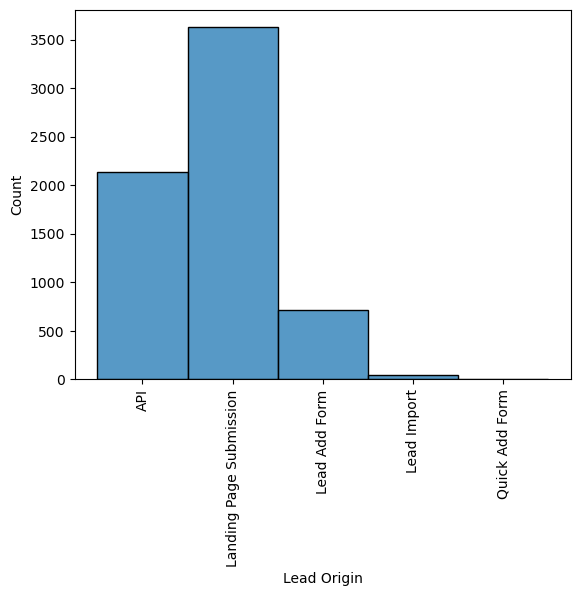

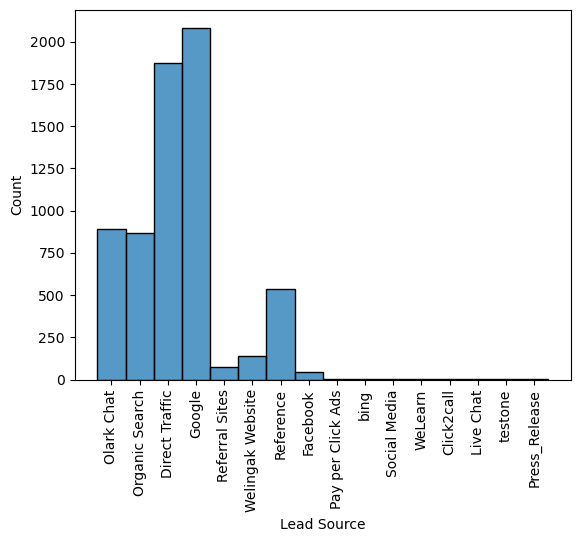

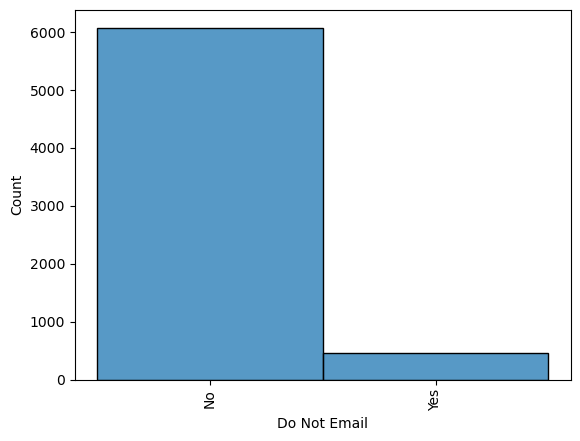

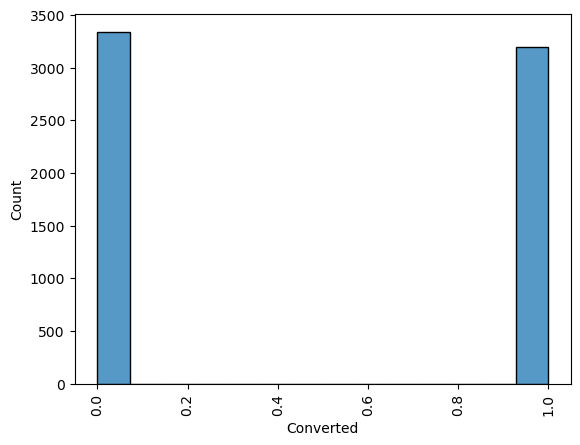

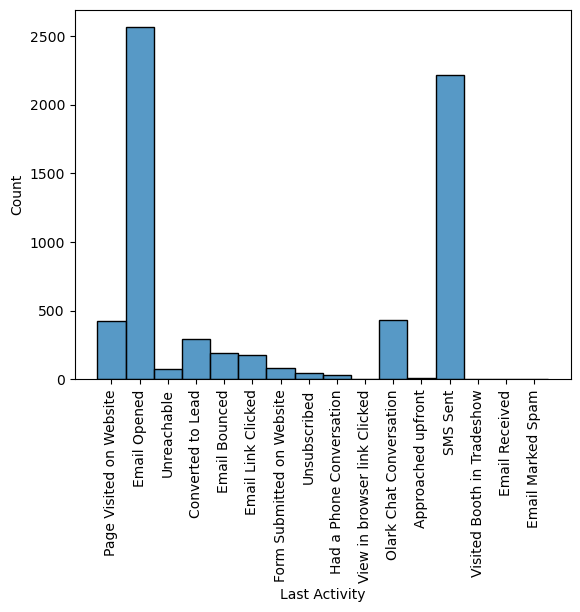

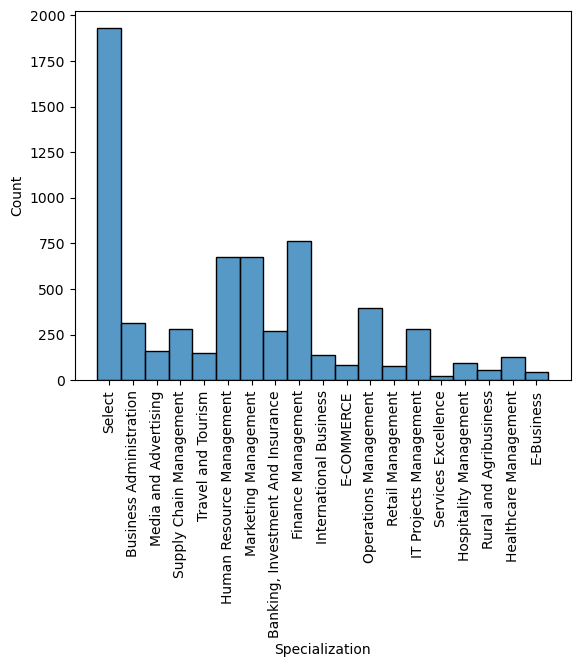

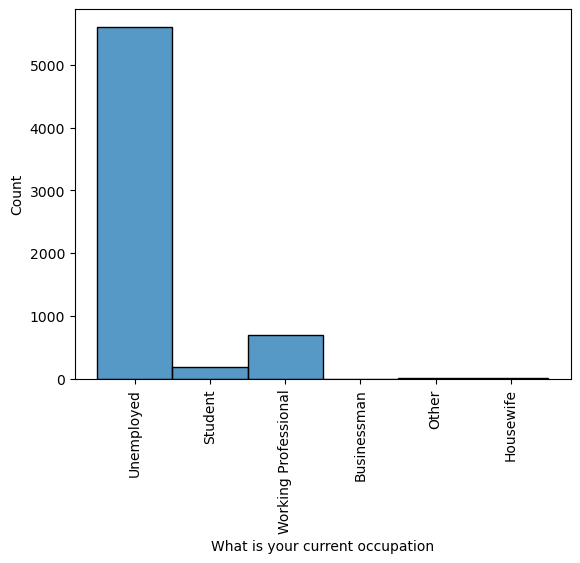

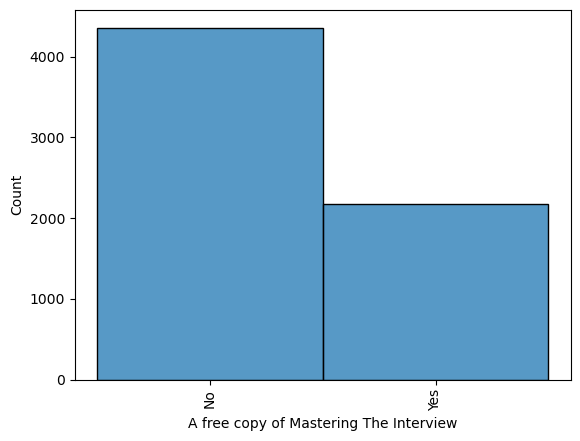

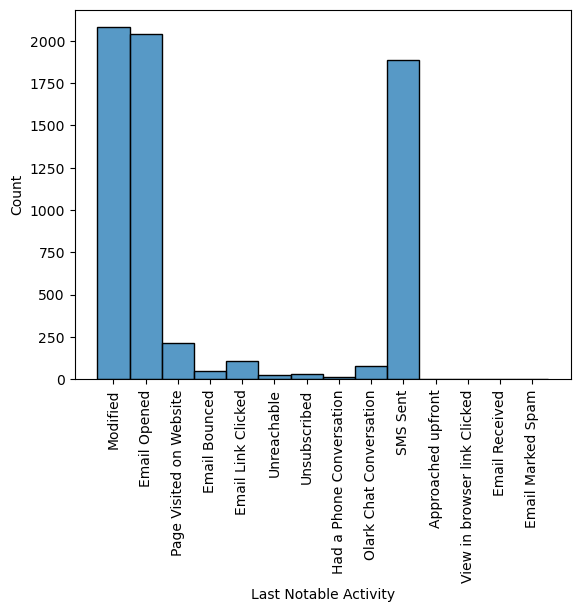

In [51]:
for col in cols:
    sns.histplot(data = lead, x = col)
    plt.xticks(rotation = 90)
    plt.show()

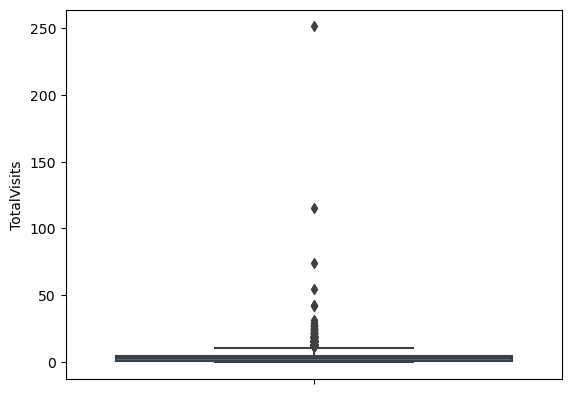

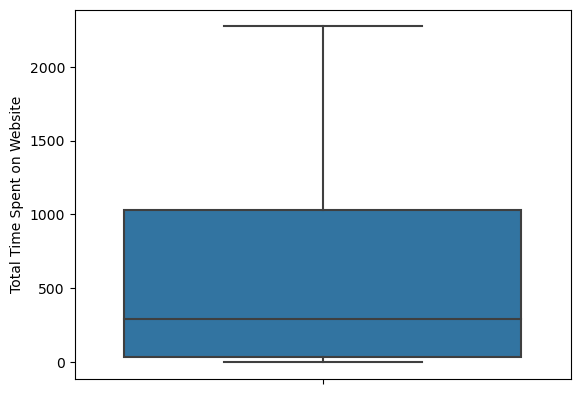

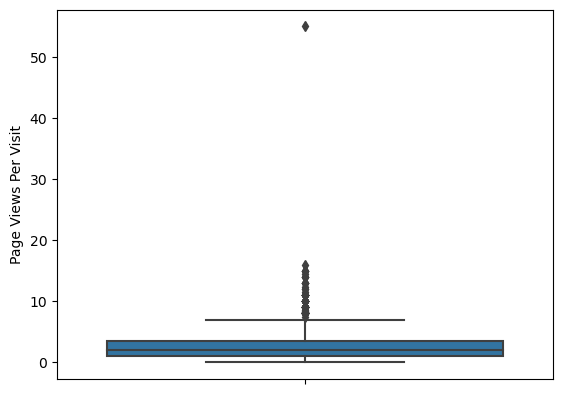

In [52]:
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

for col in num_cols:
    sns.boxplot(data = lead, y = col)
    plt.show()

In [53]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6532.000000,6532.000000,6532.000000,6532.000000
mean,0.488518,3.595989,540.843693,2.460196
std,0.499906,4.993102,568.185493,2.147953
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,35.000000,1.000000
50%,0.000000,3.000000,293.000000,2.000000
75%,1.000000,5.000000,1031.250000,3.500000
max,1.000000,251.000000,2272.000000,55.000000


### There is definitely an outlier present in variables - 'TotalVisits' and 'Page Views Per Visit'

## Bivariate Analysis

- X = all features except converted
- y = converted

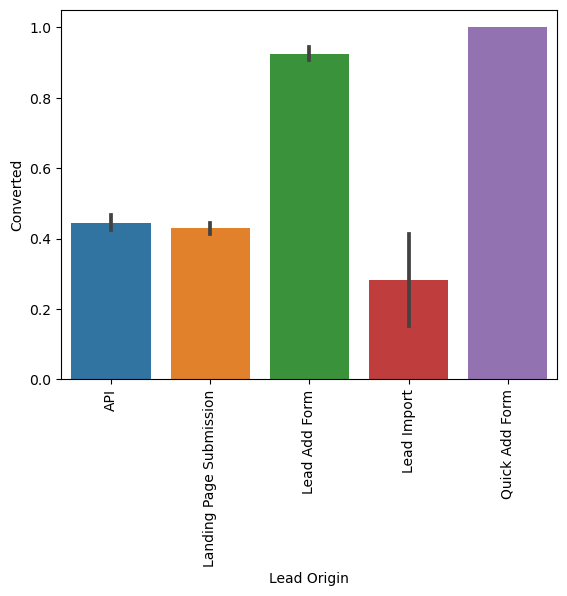

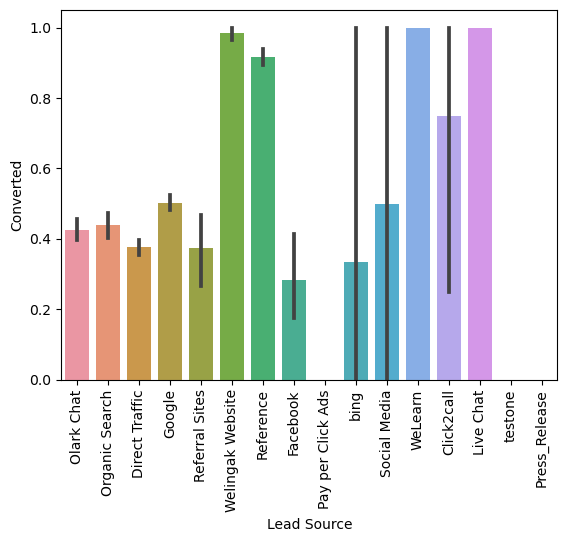

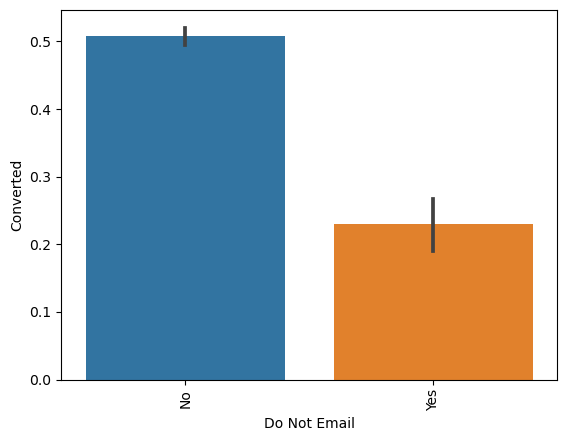

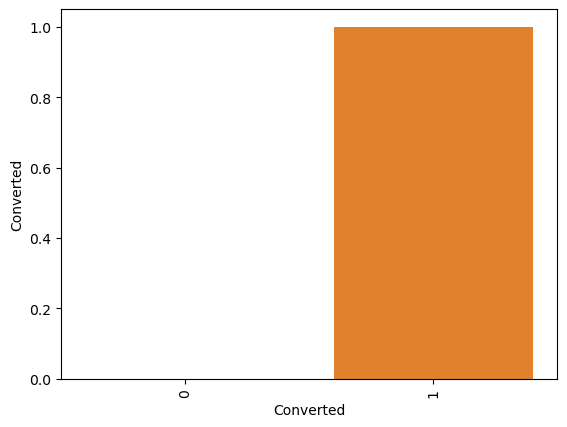

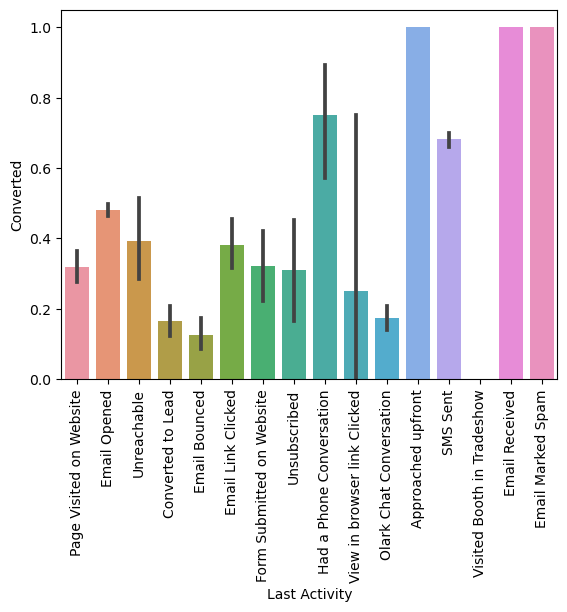

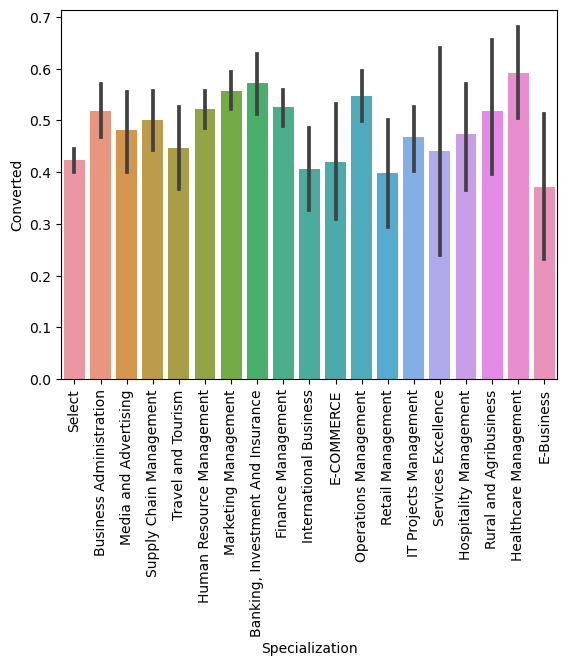

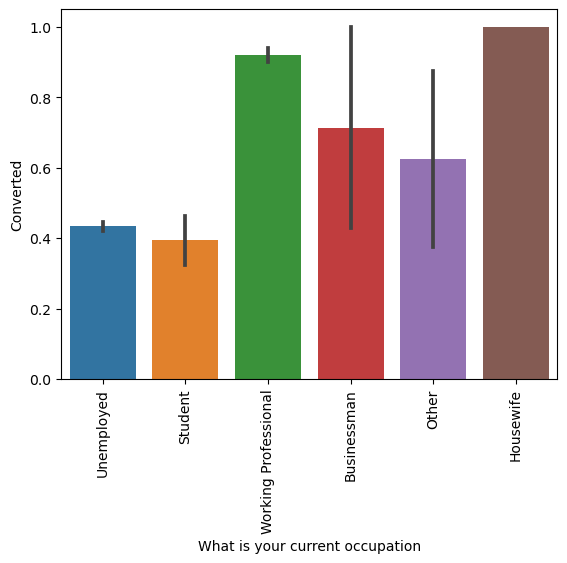

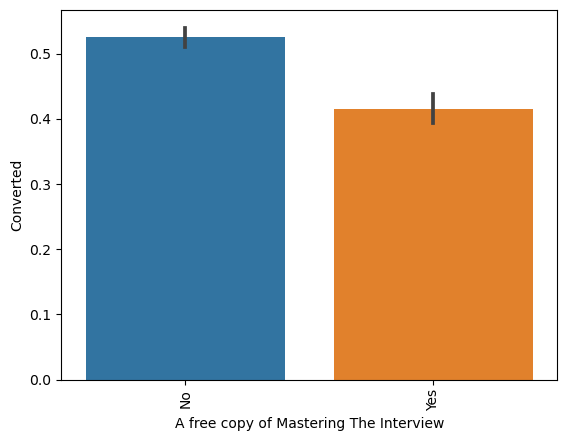

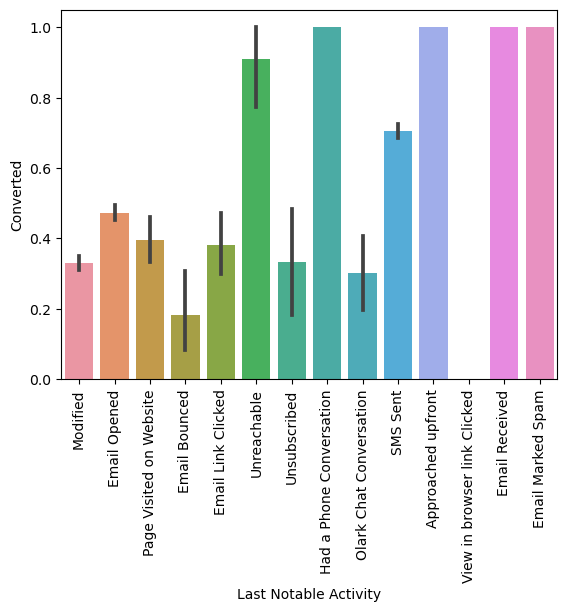

In [54]:
for col in cols:
    sns.barplot(data = lead, x = col, y = 'Converted')
    plt.xticks(rotation = 90)
    plt.show()

## Multivariate Analysis

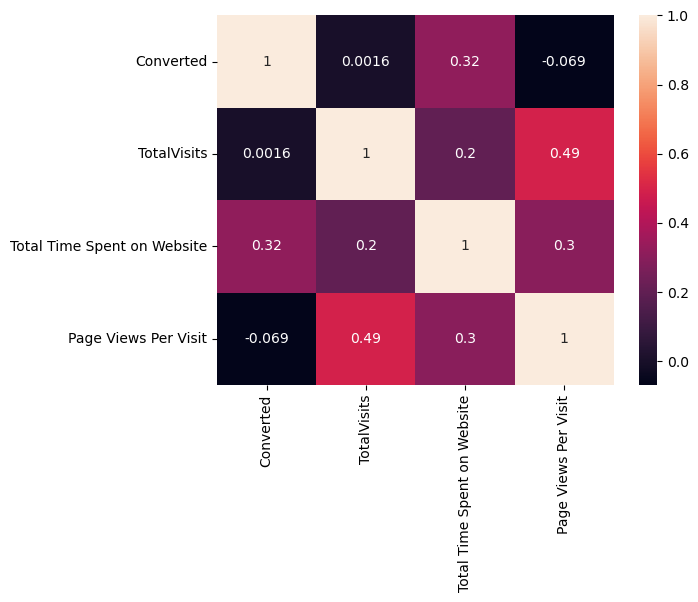

In [55]:
sns.heatmap(lead.corr(), annot = True)
plt.show()

### From basic correlation or basic data analysis using heatmap, it is clear that the one who spent more time on website were highly converted or taken the course because there is high correlation between features 'Total Time Spent on Website' and 'Converted'.

# STEP 4: DATA TRANSFORMATION

## DUMMY VARIABLE CREATION

### The categorical features are nominal in this dataset
### Therefore, use "One-Hot Encoding" method

In [56]:
dummyFeature = lead.loc[:,lead.dtypes == 'object']

In [57]:
dummyFeature.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### In the above categorical variables, drop 'Select' category features on variable 'Specialization'

In [58]:
dummy_specialization = pd.get_dummies(lead['Specialization'], prefix = 'Specialization')

In [59]:
dummy_specialization.head(2)

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [60]:
# drop 'Specialization_Select' feature

dummy_specialization.drop('Specialization_Select', axis = 1, inplace = True)

In [61]:
dummy_specialization.shape

(6532, 18)

### create dummy features for all other categorical variables

In [62]:
dummy_remaining = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first = True)
dummy_remaining.head(2)

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [63]:
dummy_remaining.shape

(6532, 54)

### drop all the original features from the source dataframe

In [64]:
lead.drop(dummyFeature.columns, axis = 1, inplace = True)

In [65]:
lead.shape

(6532, 4)

In [66]:
dummy_specialization.head(2)

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Concat all the dataframes

In [67]:
lead = pd.concat([lead,dummy_specialization], axis = 1)

In [68]:
lead = pd.concat([lead, dummy_remaining], axis = 1)

In [69]:
lead.shape

(6532, 76)

In [70]:
lead.head(2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [71]:
lead.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       

## TRAIN TEST SPLIT

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X = lead.drop('Converted', axis = 1)
y = lead['Converted']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 100)

## PREPROCESSING - SCALING

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
# scaling the numerical variables

num_cols = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']

In [77]:
scaler = MinMaxScaler()

In [78]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols]) # Training data - Therefore, fit_transform the data

In [79]:
X_train.head(2)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8405,0.007968,0.066901,0.125,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6024,0.015936,0.084067,0.250,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## CHECKING CORRELATIONS

In [80]:
lead.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.001607,0.316880,-0.068889,0.034815,0.013752,-0.018960,-0.015415,0.026475,0.028916,...,-0.020186,0.012661,0.045694,-0.215707,-0.040348,-0.034581,0.275059,0.048911,-0.022122,-0.012093
TotalVisits,0.001607,1.000000,0.200101,0.490900,0.042849,0.035815,0.015687,0.019319,0.031890,0.026969,...,0.029501,0.005958,0.026318,-0.088702,-0.004373,0.227380,-0.029813,0.003116,-0.001154,0.010915
Total Time Spent on Website,0.316880,0.200101,1.000000,0.299313,0.026128,0.049192,0.003061,-0.001238,0.059473,0.020076,...,0.011701,0.004795,0.023768,-0.080416,-0.010740,0.032715,0.068198,0.009578,-0.003340,-0.009841
Page Views Per Visit,-0.068889,0.490900,0.299313,1.000000,0.075396,0.035503,0.037391,0.039660,0.062466,0.030688,...,0.053100,0.003110,0.015862,-0.077558,-0.041168,0.019175,0.029503,0.015730,0.023268,0.001209
"Specialization_Banking, Investment And Insurance",0.034815,0.042849,0.026128,0.075396,1.000000,-0.046572,-0.016871,-0.023223,-0.075314,-0.028948,...,0.008155,-0.002564,0.025319,-0.020934,-0.015301,-0.003348,0.024142,-0.012048,-0.014768,-0.002564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Page Visited on Website,-0.034581,0.227380,0.032715,0.019175,-0.003348,0.019184,0.006372,0.002794,0.011149,-0.019353,...,-0.123814,-0.002272,-0.008199,-0.125493,-0.019920,1.000000,-0.117107,-0.010673,-0.013083,-0.002272
Last Notable Activity_SMS Sent,0.275059,-0.029813,0.068198,0.029503,0.024142,0.019248,-0.026870,0.004807,0.005928,0.009491,...,-0.430151,-0.007893,-0.028484,-0.435984,-0.069206,-0.117107,1.000000,-0.037080,-0.045452,-0.007893
Last Notable Activity_Unreachable,0.048911,0.003116,0.009578,0.015730,-0.012048,-0.013064,-0.004732,0.017363,0.052958,0.011167,...,-0.039204,-0.000719,-0.002596,-0.039735,-0.006307,-0.010673,-0.037080,1.000000,-0.004142,-0.000719
Last Notable Activity_Unsubscribed,-0.022122,-0.001154,-0.003340,0.023268,-0.014768,0.004176,0.020901,-0.007985,0.001011,0.037330,...,-0.048055,-0.000882,-0.003182,-0.048707,-0.007731,-0.013083,-0.045452,-0.004142,1.000000,-0.000882


# STEP 5: MODEL BUILDING

There are nearly 76 columns in the dataset which is high to build a model. Therefore, we need to reduce the number of columns to build a good model. Using Recursive Feature Elimination (RFE) to reduce the columns by top 15.

import logistic regression class from library sklearn.linear_model and create an logistic regression object.

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
logisticReg = LogisticRegression()

In [83]:
from sklearn.feature_selection import RFE

In [84]:
# Using rfe, select top 15 features

In [85]:
rfe = RFE(estimator = logisticReg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [86]:
# lets see what are the features selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Specialization_Banking, Investment And Insurance', False, 12),
 ('Specialization_Business Administration', False, 24),
 ('Specialization_E-Business', False, 23),
 ('Specialization_E-COMMERCE', False, 18),
 ('Specialization_Finance Management', False, 17),
 ('Specialization_Healthcare Management', False, 27),
 ('Specialization_Hospitality Management', False, 53),
 ('Specialization_Human Resource Management', False, 25),
 ('Specialization_IT Projects Management', False, 15),
 ('Specialization_International Business', False, 16),
 ('Specialization_Marketing Management', False, 20),
 ('Specialization_Media and Advertising', False, 26),
 ('Specialization_Operations Management', False, 22),
 ('Specialization_Retail Management', False, 46),
 ('Specialization_Rural and Agribusiness', False, 13),
 ('Specialization_Services Excellence', False, 28),
 ('Specialization_Supply Chain Manageme

In [87]:
col_train = X_train.columns[rfe.support_]

In [88]:
# The top 15 features to be selected by RFE are 

col_train

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [89]:
# select only the top 15 features

X_train = X_train[col_train]

### Now, we need to analysis the p-value (features must be less than the significance level of 0.05) and VIF (Variance Inflation Factor) for multicollinearity check.

In [90]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
# add a constant to X_train dataset and fit the logistic regression model

def buildmodel(X):
    X_sm = sm.add_constant(X)
    log_X = sm.GLM(y_train, X_sm, family = sm.families.Binomial())     # Generalized Linear Model for logistic regression
    res = log_X.fit()
    print(res.summary())
    return res
    
def show_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    print(vif)

## MODEL 1

In [92]:
buildmodel(X_train)
show_vif(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4572
Model:                            GLM   Df Residuals:                     4556
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2077.6
Date:                Tue, 17 Dec 2024   Deviance:                       4155.2
Time:                        18:16:23   Pearson chi2:                 4.86e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3793
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### In the above, it is clear that p-value is very high for variable 'Last Notable Activity_Had a Phone Conversation'

### Therefore, drop it

In [93]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

## MODEL 2

In [94]:
buildmodel(X_train)
show_vif(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4572
Model:                            GLM   Df Residuals:                     4557
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2085.3
Date:                Tue, 17 Dec 2024   Deviance:                       4170.5
Time:                        18:16:24   Pearson chi2:                 4.86e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3772
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### In model 2, p-value is higher than 0.05 significance level for variables 'What is your current occupation_Student'  and 'What is your current occupation_Unemployed'

### First drop 'What is your current occupation_Unemployed' because it has high p-value as well as high vif

In [95]:
X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

## MODEL 3

In [96]:
buildmodel(X_train)
show_vif(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4572
Model:                            GLM   Df Residuals:                     4558
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2086.3
Date:                Tue, 17 Dec 2024   Deviance:                       4172.7
Time:                        18:16:24   Pearson chi2:                 4.87e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3769
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### From Model 3, it has proven that 'What is your current occupation_Student' has high p-valu. Therefore, drop it

In [97]:
X_train.drop('What is your current occupation_Student', axis = 1, inplace = True)

## MODEL 4

In [98]:
buildmodel(X_train)
show_vif(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4572
Model:                            GLM   Df Residuals:                     4559
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2086.3
Date:                Tue, 17 Dec 2024   Deviance:                       4172.7
Time:                        18:16:24   Pearson chi2:                 4.87e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3769
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

## Now, all variables are below 0.05 p-value and variance inflation factor of all features are below 5. Therefore, Model 4 is good to go.

In [99]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4572 entries, 8405 to 8035
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           4572 non-null   float64
 1   Total Time Spent on Website                           4572 non-null   float64
 2   Lead Origin_Lead Add Form                             4572 non-null   uint8  
 3   Lead Source_Olark Chat                                4572 non-null   uint8  
 4   Lead Source_Welingak Website                          4572 non-null   uint8  
 5   Do Not Email_Yes                                      4572 non-null   uint8  
 6   Last Activity_Email Bounced                           4572 non-null   uint8  
 7   Last Activity_Olark Chat Conversation                 4572 non-null   uint8  
 8   Last Activity_SMS Sent                                4

In [100]:
X_train.corr()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
TotalVisits,1.000000,0.180938,-0.185444,-0.222258,-0.085647,0.032773,-0.041001,-0.067684,-0.041287,-0.016618,-0.089330,0.009991
Total Time Spent on Website,0.180938,1.000000,-0.195045,-0.317890,-0.103031,-0.049448,-0.026058,-0.112587,0.052586,0.074882,-0.080048,0.010333
Lead Origin_Lead Add Form,-0.185444,-0.195045,1.000000,-0.134988,0.426056,-0.019441,-0.021059,-0.085549,0.102775,0.193745,0.032835,-0.011045
Lead Source_Olark Chat,-0.222258,-0.317890,-0.134988,1.000000,-0.059253,-0.039471,-0.011547,0.286468,-0.061347,-0.063253,0.038568,-0.014549
Lead Source_Welingak Website,-0.085647,-0.103031,0.426056,-0.059253,1.000000,0.005842,-0.016212,-0.032763,0.066648,-0.052962,-0.013847,-0.009449
Do Not Email_Yes,0.032773,-0.049448,-0.019441,-0.039471,0.005842,1.000000,0.558910,-0.038690,0.000010,-0.057724,0.063658,-0.017160
Last Activity_Email Bounced,-0.041001,-0.026058,-0.021059,-0.011547,-0.016212,0.558910,1.000000,-0.043568,-0.121861,-0.055059,0.156511,-0.010584
Last Activity_Olark Chat Conversation,-0.067684,-0.112587,-0.085549,0.286468,-0.032763,-0.038690,-0.043568,1.000000,-0.187340,-0.065305,0.284309,-0.016271
Last Activity_SMS Sent,-0.041287,0.052586,0.102775,-0.061347,0.066648,0.000010,-0.121861,-0.187340,1.000000,0.112184,-0.278694,-0.045510
What is your current occupation_Working Professional,-0.016618,0.074882,0.193745,-0.063253,-0.052962,-0.057724,-0.055059,-0.065305,0.112184,1.000000,-0.069853,0.022417


## STEP 6: MODEL EVALUATION

In [101]:
res = buildmodel(X_train)
show_vif(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4572
Model:                            GLM   Df Residuals:                     4559
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2086.3
Date:                Tue, 17 Dec 2024   Deviance:                       4172.7
Time:                        18:16:25   Pearson chi2:                 4.87e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3769
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [102]:
# adding constant to a linear logistic model
X_train_sm = sm.add_constant(X_train)

# predict the target variable (finding probability of 'converted' variable)
y_train_pred = res.predict(sm.add_constant(X_train_sm))

In [103]:
y_train_pred

8405    0.013434
6024    0.187636
148     0.203456
3854    0.534813
2784    0.697771
          ...   
8541    0.969833
96      0.165416
5730    0.164976
8453    0.120263
8035    0.649404
Length: 4572, dtype: float64

In [104]:
# Reshaping 'y_train_pred' into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01343399, 0.18763576, 0.20345553, 0.53481286, 0.69777069,
       0.36763275, 0.72979017, 0.90485625, 0.07840419, 0.69597062])

### Creating dataframe with two columns - Actual conversion binary column and predicted conversion probability column

In [105]:
y_train_pred_df = pd.DataFrame({'Actual_converted': y_train.values, 'Prob_converted': y_train_pred})

In [106]:
y_train_pred_df.head(3)

,Actual_converted,Prob_converted
0,0,0.013434
1,0,0.187636
2,0,0.203456


### let set the cut-off probability of converted as 0.4

In [107]:
y_train_pred_df['Predicted'] = y_train_pred_df.Prob_converted.map(lambda x: 1 if x > 0.4 else 0)

In [108]:
y_train_pred_df.head()

,Actual_converted,Prob_converted,Predicted
0,0,0.013434,0
1,0,0.187636,0
2,0,0.203456,0
3,1,0.534813,1
4,1,0.697771,1


## Evaluate the model with metrics like Accuracy, Sensitivity, and Specificity

In [109]:
from sklearn import metrics

In [110]:
confusion = metrics.confusion_matrix(y_train_pred_df.Actual_converted, y_train_pred_df.Predicted)

In [111]:
confusion

array([[1702,  641],
       [ 343, 1886]], dtype=int64)

In [112]:
# Confusion Matrix

confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [0, 1])

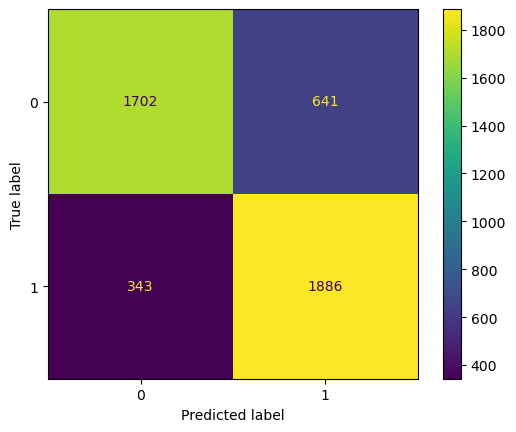

In [113]:
confusion_matrix_display.plot()
plt.show()

The Confusion Matrix created has four different quadrants:

- True Negative (Top-Left Quadrant) -> Not converted are correctly predicted
- False Positive (Top-Right Quadrant) -> Not converted are falsely predicted as converted 
- False Negative (Bottom-Left Quadrant) -> converted are falsely predicted as not converted
- True Positive (Bottom-Right Quadrant) -> converted are correctly predicted

True means that the values were accurately predicted, False means that there was an error or wrong prediction.

In [114]:
# Accuracy score

print(metrics.accuracy_score(y_train_pred_df.Actual_converted, y_train_pred_df.Predicted))

0.7847769028871391


In [115]:
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

In [116]:
y_train.shape

(4572,)

In [117]:
# Accuracy

acc = (TN + TP)/(y_train.shape[0])

In [118]:
acc

0.7847769028871391

In [119]:
# Sensitivity

sen = TP / (TP+FN)
sen

0.8461193360251233

In [120]:
# Specificity

spec =  TN / (TN+FP)
spec

0.726419120785318

## FINDING THE OPTIMAL CUTOFF

In [121]:
# ROC function

def draw_roc( actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,                                  
                                              drop_intermediate = False )     
    auc_score = metrics.roc_auc_score( actual, probs )                         
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate  or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [122]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df.Actual_converted, y_train_pred_df.Prob_converted, drop_intermediate = False )

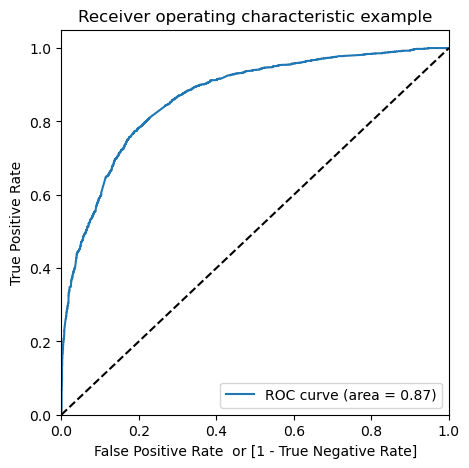

In [123]:
# Call the ROC function

draw_roc(y_train_pred_df.Actual_converted, y_train_pred_df.Prob_converted)

In [124]:
# The area covered by the ROC curve is 0.86 (86%) which is perfectly good to continue.

### Find the optimal cutoff by plotting a graph for different probabilities cutoffs

In [125]:
for i in np.arange(0.1,1,0.1):
    i = round(i,1)
    y_train_pred_df[i] = y_train_pred_df.Prob_converted.map(lambda x: 1 if x > i else 0)
    
y_train_pred_df.head(2)

,Actual_converted,Prob_converted,Predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.013434,0,0,0,0,0,0,0,0,0,0
1,0,0.187636,0,1,0,0,0,0,0,0,0,0


In [126]:
Prob_cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    confusion_mat = metrics.confusion_matrix(y_train_pred_df.Actual_converted, y_train_pred_df[i] )
    
    accuracy = (confusion_mat[0,0]+confusion_mat[1,1])/y_train_pred_df.shape[0]
    
    specificity = confusion_mat[0,0]/(confusion_mat[0,0]+confusion_mat[0,1])
    sensitivity = confusion_mat[1,1]/(confusion_mat[1,0]+confusion_mat[1,1])
    Prob_cutoff_df.loc[i] =[ i , accuracy, sensitivity, specificity]
    
Prob_cutoff_df

,probability,accuracy,sensitivity,specificity
0.1,0.1,0.569335,0.985644,0.173282
0.2,0.2,0.707130,0.943921,0.481861
0.3,0.3,0.763998,0.900852,0.633803
0.4,0.4,0.784777,0.846119,0.726419
0.5,0.5,0.789589,0.744729,0.832266
0.6,0.6,0.774934,0.675639,0.869398
0.7,0.7,0.738408,0.555406,0.912505
0.8,0.8,0.711286,0.458502,0.951771
0.9,0.9,0.648950,0.297891,0.982928


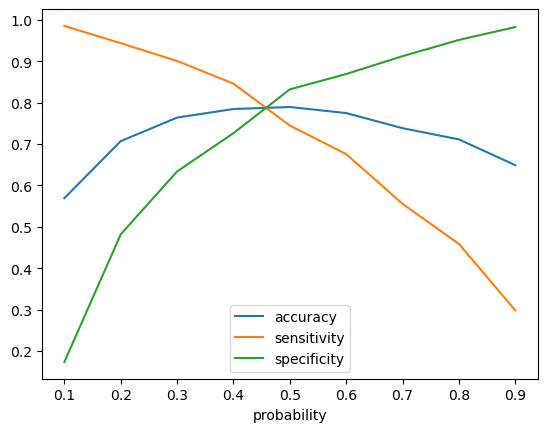

In [127]:
Prob_cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

### The metrics accuracy, sensitivity, and specificity curves are meet at prabability cutoff 0.44. Therefore, the optimal cutoff probability is 0.44 

In [128]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Prob_converted.map(lambda x: 1 if x > 0.44 else 0)
y_train_pred_df.head(5)

,Actual_converted,Prob_converted,Predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.013434,0,0,0,0,0,0,0,0,0,0,0
1,0,0.187636,0,1,0,0,0,0,0,0,0,0,0
2,0,0.203456,0,1,1,0,0,0,0,0,0,0,0
3,1,0.534813,1,1,1,1,1,1,0,0,0,0,1
4,1,0.697771,1,1,1,1,1,1,1,0,0,0,1


## Train Accuracy

In [129]:
acc_train = metrics.accuracy_score(y_train_pred_df.Actual_converted, y_train_pred_df.final_predicted) 
acc_train

0.7906824146981627

## Confusion Matrix

In [130]:
confusion_train = metrics.confusion_matrix(y_train_pred_df.Actual_converted, y_train_pred_df.final_predicted)
confusion_train

array([[1861,  482],
       [ 475, 1754]], dtype=int64)

In [131]:
TN = confusion_train[0,0]
FP = confusion_train[0,1]
FN = confusion_train[1,0]
TP = confusion_train[1,1]

## Train Sensitivity

In [132]:
sensitivity_train = TP / (TP + FN)
sensitivity_train

0.7868999551368326

## Train Specificity

In [133]:
specificity_train = TN / (TN + FP)
specificity_train

0.7942808365343577

## Train False Positive Rate (FPR)

In [134]:
FPR_train = FP / (TN + FN)
FPR_train

0.20633561643835616

### Sensitivity = 0.78 (High) and FPR = 0.20 (Low) - good model

# STEP 4: MAKING PREDICTION ON TEST DATASET

In [135]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[X_train.columns]
X_test.head(3)

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
2185,0.011952,0.116197,0,0,0,0,0,0,0,0,0,0
2037,0.007968,0.151408,0,0,0,0,0,1,0,0,1,0
9025,0.011952,0.055458,0,0,0,0,0,0,1,0,0,0


In [136]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head(3)

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
2185,1.0,0.011952,0.116197,0,0,0,0,0,0,0,0,0,0
2037,1.0,0.007968,0.151408,0,0,0,0,0,1,0,0,1,0
9025,1.0,0.011952,0.055458,0,0,0,0,0,0,1,0,0,0


In [137]:
y_test_pred = res.predict(X_test_sm)

In [138]:
y_test_pred_df = pd.DataFrame({'Actual_converted': y_test.values, 'Prob_converted': y_test_pred})
y_test_pred_df.head(3)

,Actual_converted,Prob_converted
2185,0,0.206346
2037,0,0.056237
9025,0,0.351877


In [139]:
# Make predictions on the test set using 0.44 as the cutoff

y_test_pred_df['final_predicted'] = y_test_pred_df.Prob_converted.map(lambda x: 1 if x > 0.44 else 0)
y_test_pred_df.head(3)

,Actual_converted,Prob_converted,final_predicted
2185,0,0.206346,0
2037,0,0.056237,0
9025,0,0.351877,0


In [140]:
# Test Accuracy

acc_test = metrics.accuracy_score(y_test_pred_df.Actual_converted, y_test_pred_df.final_predicted) 
acc_test

0.7974489795918367

In [141]:
# Test Confusion Matrix

confusion_test = metrics.confusion_matrix(y_test_pred_df.Actual_converted, y_test_pred_df.final_predicted)
confusion_test

array([[810, 188],
       [209, 753]], dtype=int64)

In [142]:
TN_test = confusion_test[0,0]
FP_test = confusion_test[0,1]
FN_test = confusion_test[1,0]
TP_test = confusion_test[1,1]

In [143]:
# Test Sensitivity

sensitivity_test = TP_test / (TP_test + FN_test)
sensitivity_test

0.7827442827442828

In [144]:
# Test Specificity

specificity_test = TN_test / (TN_test + FP_test)
specificity_test

0.811623246492986

In [145]:
result_metrics = pd.DataFrame({'DataSet_type': ['Train', 'Test'], 
                               'Accuracy': [acc_train, acc_test],
                               'Sensitivity': [sensitivity_train, sensitivity_test], 
                               'Specificity': [specificity_train, specificity_test]
                              })
result_metrics 

,DataSet_type,Accuracy,Sensitivity,Specificity
0,Train,0.790682,0.786900,0.794281
1,Test,0.797449,0.782744,0.811623


## PRECISION-RECALL VIEW

In [146]:
# Train dataset

In [147]:
precision = metrics.precision_score(y_train_pred_df.Actual_converted, y_train_pred_df.Predicted)
precision

0.7463395330431342

In [148]:
sensitivity_recall = metrics.recall_score(y_train_pred_df.Actual_converted, y_train_pred_df.Predicted)
sensitivity_recall

0.8461193360251233

In [149]:
from sklearn.metrics import precision_recall_curve

In [150]:
p, r, thresholds = precision_recall_curve(y_train_pred_df.Actual_converted, y_train_pred_df.Prob_converted)

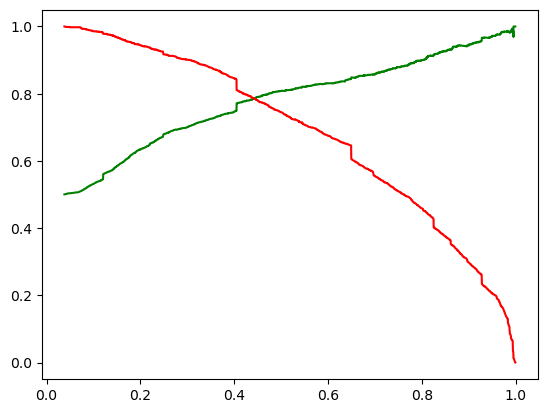

In [151]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### The optimal probability cutoff point is approximately 0.44

In [152]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Prob_converted.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_df.head()

,Actual_converted,Prob_converted,Predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.013434,0,0,0,0,0,0,0,0,0,0,0
1,0,0.187636,0,1,0,0,0,0,0,0,0,0,0
2,0,0.203456,0,1,1,0,0,0,0,0,0,0,0
3,1,0.534813,1,1,1,1,1,1,0,0,0,0,1
4,1,0.697771,1,1,1,1,1,1,1,0,0,0,1


In [153]:
result_metrics = pd.DataFrame({'DataSet_type': ['Train', 'Test'], 
                               'Accuracy': [acc_train, acc_test],
                               'Sensitivity': [sensitivity_train, sensitivity_test], 
                               'Specificity': [specificity_train, specificity_test]
                              })
result_metrics 

,DataSet_type,Accuracy,Sensitivity,Specificity
0,Train,0.790682,0.786900,0.794281
1,Test,0.797449,0.782744,0.811623


## F-Score

In [154]:
F = (2 * precision * sensitivity_recall)/(precision + sensitivity_recall)
F

0.7931034482758621

### The F-score (also known as the F1 score or F-measure) is a metric used to evaluate the performance of a Machine Learning model. F-Score = 0.793 which is good to go.

# Conclusion

In [155]:
buildmodel(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4572
Model:                            GLM   Df Residuals:                     4559
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2086.3
Date:                Tue, 17 Dec 2024   Deviance:                       4172.7
Time:                        18:16:27   Pearson chi2:                 4.87e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3769
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

1. The top 3 features contributing more to the convertion rate of the lead on logistic regression model are 
    -'TotalVistis', 
    -'Total Time Spent on Website', and 
    -'Lead Origin_Lead Add Form'.

2. The top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion are 
    -'Lead Source_Welingak Website', 
    -'Lead Origin_Lead Add Form', and 
    -'Last Notable Activity_Unreachable'

The number of visits made by the leads are the most important factor for converting the leads.
The more the lead visits the website, the more the chance of taking the course.